Name: Rahmani Dibansa

Date: 25th of August 2022

Description: This contains my understanding of how tenArmBandit works.

Reference(s): ACMSIGGRAPH. SIGGRAPH Now | Hands-on Workshop: Machine Learning and Neural Networks – Lecture 9

Retrieved from: https://www.youtube.com/watch?v=M5y6Eyzlm2g&list=PLUPhVMQuDB_b2kcOooEduedthcBH53mvC&index=9

Additional Comments:
    
    -In the ten arm bandit problem, we have an n number (could be 10) of slot machines. So, how should we choose?
    -Our First option is to randomly choose a slot machine and play it. But that wouldn't be ideal, right? 
    -As such, on the second option, we take note of our average winning on each machine. Then, we choose which ones pay the most.
    -But again, this has a problem, if we stick to a single slot machine, we wouldn't know whether the other machines would pay more. That is why, we add in the option to be Greedy-epsilon or in other words we exploit and explore other options(slot machines).
    -However, on the third option, we face another problem. That is... what do we do after exploring all other options? Should we continue exploring? No, right? we want to maximize our winnings. To make that possible, as time passes by, we should explore less so that we can win as much as possible.

In [1]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# -----------rewards table
# mean, variance
reward_means = np.random.randint(1, 100, 10)
reward_std = np.floor(reward_means/3 * np.random.random(10))
print('Mean Rewards:', reward_means)
print ('Rewards Std deviation:', reward_std)

Mean Rewards: [96 26 21 28  7 21 39 69 50 80]
Rewards Std deviation: [ 5.  2.  0.  2.  1.  4. 11. 22.  0.  3.]


In [3]:
# create a reward set (sample from the rewards distribution)
def create_reward_set():
    reward_set = np.floor(np.random.normal(reward_means, reward_std, 10))
    return(reward_set)

print(create_reward_set())

[94. 27. 21. 29.  7. 17. 41. 96. 50. 80.]


In [4]:
# radom strategy
num_actions = 10
num_trials = 1000
total_reward = 0
actions_selected = []
total_maximum_reward = 0
maximum_reward_actions = []
rand_average_reward = []
max_average_reward = []

# run num_trials
for n in range(0, num_trials):
    reward_set = create_reward_set()
    # choose an action (reward) at random (Naive Strategy)
    action = np.random.randint(0, num_actions, 1)[0]
    # make a note of the action selected
    actions_selected.append(action)
    # get the reward for that action
    total_reward = total_reward + reward_set[action]
    rand_average_reward.append(total_reward/(n+1))
    maximum_reward_action = np.argmax(reward_set)
    maximum_reward_actions.append(maximum_reward_action)
    total_maximum_reward = total_maximum_reward + reward_set[maximum_reward_action]
    max_average_reward.append(total_maximum_reward/(n+1))

# print a summary 
print('Rewards Table:', reward_means)
print('Rewards Std deviation:', reward_std)
print('Actions Selected:\t', actions_selected)
print('Maximum reward actions:\t', maximum_reward_actions)
print('Random - Average reward over time', rand_average_reward)
print('Maximal - Average reward over time', max_average_reward)
print('Total Reward:', total_reward)
print('Expected Total rewards:', num_trials*np.mean(reward_means))
print('Maximum possible reward:', total_maximum_reward)

Rewards Table: [96 26 21 28  7 21 39 69 50 80]
Rewards Std deviation: [ 5.  2.  0.  2.  1.  4. 11. 22.  0.  3.]
Actions Selected:	 [8, 5, 3, 9, 6, 1, 8, 5, 9, 7, 4, 5, 2, 9, 0, 4, 6, 1, 9, 2, 0, 1, 0, 4, 3, 7, 9, 7, 0, 6, 8, 3, 0, 1, 7, 6, 5, 8, 8, 1, 4, 0, 1, 3, 0, 3, 3, 7, 2, 5, 6, 5, 6, 1, 4, 6, 1, 7, 4, 7, 0, 4, 3, 5, 3, 2, 7, 5, 5, 6, 1, 8, 3, 9, 7, 2, 8, 3, 6, 1, 4, 0, 6, 8, 8, 5, 4, 3, 4, 4, 7, 5, 2, 5, 8, 9, 2, 6, 9, 1, 2, 7, 1, 8, 3, 1, 0, 1, 4, 0, 2, 4, 0, 4, 9, 7, 2, 7, 8, 3, 7, 4, 6, 6, 5, 0, 1, 0, 6, 3, 6, 3, 5, 2, 9, 6, 0, 0, 4, 6, 5, 5, 2, 7, 6, 8, 8, 3, 7, 5, 7, 5, 6, 2, 5, 4, 2, 8, 8, 0, 3, 4, 6, 5, 8, 1, 4, 2, 9, 0, 9, 9, 0, 0, 2, 1, 1, 0, 1, 4, 0, 0, 8, 6, 1, 5, 7, 4, 2, 8, 7, 5, 9, 4, 9, 6, 8, 9, 0, 8, 4, 9, 2, 3, 1, 5, 4, 8, 7, 8, 5, 6, 2, 6, 6, 7, 5, 7, 9, 4, 6, 2, 2, 8, 0, 6, 3, 3, 6, 3, 3, 9, 5, 4, 5, 9, 8, 6, 0, 1, 4, 9, 8, 0, 2, 3, 8, 7, 4, 3, 3, 6, 0, 8, 7, 3, 1, 7, 8, 8, 7, 0, 2, 2, 4, 9, 5, 2, 9, 2, 3, 2, 6, 7, 6, 2, 5, 4, 5, 1, 9, 9, 6, 5, 9, 1, 6, 6, 7, 9

<Figure size 792x576 with 0 Axes>

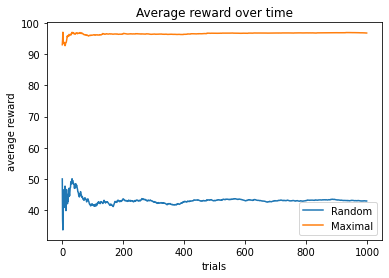

In [5]:
fig = plt.figure(figsize=(11,8))
t = np.arange(0, n+1, 1)
fig, ax = plt.subplots()
ax.plot(t, rand_average_reward, label='Random')
ax.plot(t, max_average_reward, label='Maximal')
ax.set(xlabel='trials', ylabel='average reward',
       title='Average reward over time')
plt.legend()
plt.show()

In [6]:
 #---------Epsilon-Greedy Strategy
num_actions = 10
num_trials = 10000
total_reward = 0
total_maximum_reward = 0
maximum_reward_actions = []
max_average_reward = []
average_egreedy_reward = []
total_egreedy_reward = 0
Q_table = [0.0]*num_actions
Q_table_counts = [0.0]*num_actions
epsilon = 0.01
action = None

print('Rewards Table:', reward_means)
print ('Rewards Std deviation:', reward_std)

# run num_trials
for n in range(0, num_trials):
    # choose between qtable runnin-average or random with 'epsilon' probablity
    choice = np.random.choice(['random', 'qtable'], p=[epsilon, 1-epsilon])
    if choice == 'qtable':
        # next action: take the action with the highest average Q_table value)
        action = np.argmax(Q_table)
    else:
        # next action: choose a random action
        action = np.random.randint(0, num_actions, 1)[0]
    
    # distribute the rewards
    reward_set = create_reward_set()

    # tabulate the maximums
    maximum_reward_action = np.argmax(reward_set)
    total_maximum_reward = total_maximum_reward + reward_set[maximum_reward_action]
    max_average_reward.append(total_maximum_reward/(n+1))
    maximum_reward_actions.append(maximum_reward_action)

    # average reward 
    total_egreedy_reward = total_egreedy_reward + reward_set[action]
    average_egreedy_reward.append(total_egreedy_reward/(n+1))
    # update the Q_table
    Q_table_counts[action] = Q_table_counts[action] + 1
    Q_table[action] = Q_table[action] + 1.0/Q_table_counts[action] * (reward_set[action] - Q_table[action]) 


print('Total Reward:', np.sum((np.multiply(Q_table, Q_table_counts))))
print('Avg Expected Total rewards', num_trials*np.mean(reward_means))
print('Total Maximum reward:', total_maximum_reward)
print('Qtable:', Q_table)
print('Qtable_counts:', Q_table_counts)
print('Epsilon:', epsilon, 'Num-Trials:', num_trials)


Rewards Table: [96 26 21 28  7 21 39 69 50 80]
Rewards Std deviation: [ 5.  2.  0.  2.  1.  4. 11. 22.  0.  3.]
Total Reward: 950161.9999999981
Avg Expected Total rewards 437000.0
Total Maximum reward: 968093.0
Qtable: [95.57442728832356, 26.25, 21.0, 27.058823529411768, 6.384615384615385, 18.285714285714285, 37.18181818181818, 61.14285714285714, 50.0, 78.69999999999999]
Qtable_counts: [9909.0, 8.0, 10.0, 17.0, 13.0, 7.0, 11.0, 7.0, 8.0, 10.0]
Epsilon: 0.01 Num-Trials: 10000


<Figure size 792x576 with 0 Axes>

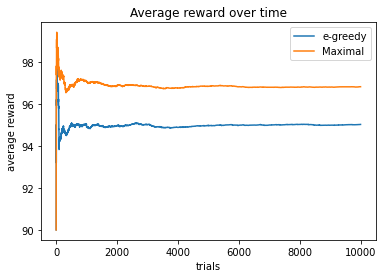

In [7]:
fig = plt.figure(figsize=(11,8))
t = np.arange(0, n+1, 1)
fig, ax = plt.subplots()
ax.plot(t, average_egreedy_reward, label='e-greedy')
ax.plot(t, max_average_reward, label='Maximal')
ax.set(xlabel='trials', ylabel='average reward',
       title='Average reward over time')
plt.legend()
plt.show()